In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import category_encoders as ce
import os
import pickle
import gc
from tqdm import tqdm
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import ensemble
import xgboost as xgb
from numpy import loadtxt
from keras.utils.vis_utils import plot_model
import pydot

Using TensorFlow backend.


In [0]:
pip install category_encoders

     |████████████████████████████████| 102kB 306kB/s 


In [0]:
def encode_text_features(encode_decode, data_frame, encoder_isa=None, encoder_mem_type=None):
    # Implement Categorical OneHot encoding for ISA and mem-type
    if encode_decode == 'encode':
        encoder_isa = ce.one_hot.OneHotEncoder(cols=['isa'])
        encoder_mem_type = ce.one_hot.OneHotEncoder(cols=['mem-type'])
        encoder_isa.fit(data_frame, verbose=1)
        df_new1 = encoder_isa.transform(data_frame)
        encoder_mem_type.fit(df_new1, verbose=1)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
    else:
        df_new1 = encoder_isa.transform(data_frame)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
        
    return encoded_data_frame, encoder_isa, encoder_mem_type

In [0]:
all_datasets = '\\Dataset_CSV\\Transfer_Learning\\Qsort_Intel_to_Intel-Xeon\\'
df = pd.read_csv('Intel_Qsort_Physical.csv')
dfn = pd.read_csv('Intel_Xeon_Qsort_Physical.csv')

In [0]:
df.head()

,arch,cpu-clock,isa,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,l2_cache_lines,l2_shared_by_threads,l2_size,l3_assoc,l3_cache_lines,l3_shared_by_threads,l3_size,mem-size,mem-type,mem_clock,num-cpus,runtime,bus_speed
0,IntelCore2Duo_DDR2667_2GB,1.6,X86_64,8,64,1,32,2,64,1,512,0,0,0,0,2,DDR2,667,1,7049.80,2048
1,IntelCore2Duo_DDR2667_2GB,1.6,X86_64,8,64,1,32,2,64,1,512,0,0,0,0,2,DDR2,667,2,5936.48,2048
2,IntelCore2Duo_DDR2667_2GB,1.6,X86_64,8,64,1,32,2,64,1,512,0,0,0,0,2,DDR2,667,3,6163.20,2048
3,IntelCore2Duo_DDR2667_2GB,1.6,X86_64,8,64,1,32,2,64,1,512,0,0,0,0,2,DDR2,667,4,5656.76,2048
4,IntelCore2Duo_DDR2667_2GB,1.6,X86_64,8,64,1,32,2,64,1,512,0,0,0,0,2,DDR2,667,5,5899.16,2048


In [0]:
dfn.head()

,arch,cpu-clock,isa,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,l2_cache_lines,l2_shared_by_threads,l2_size,l3_assoc,l3_cache_lines,l3_shared_by_threads,l3_size,mem-size,mem-type,mem_clock,num-cpus,runtime,bus_speed
0,IntelXeonE52620_DDR41866_16GB,2.4,X86_64,8,64,1,32,8,64,1,256,8,64,12,15360,16,DDR4,1866,1,12945.40,32768
1,IntelXeonE52620_DDR41866_16GB,2.4,X86_64,8,64,1,32,8,64,1,256,8,64,12,15360,16,DDR4,1866,2,10084.36,32768
2,IntelXeonE52620_DDR41866_16GB,2.4,X86_64,8,64,1,32,8,64,1,256,8,64,12,15360,16,DDR4,1866,3,9943.28,32768
3,IntelXeonE52620_DDR41866_16GB,2.4,X86_64,8,64,1,32,8,64,1,256,8,64,12,15360,16,DDR4,1866,4,9433.28,32768
4,IntelXeonE52620_DDR41866_16GB,2.4,X86_64,8,64,1,32,8,64,1,256,8,64,12,15360,16,DDR4,1866,5,8592.68,32768


In [0]:
df.columns, len(df.columns), dfn.columns, len(dfn.columns) # bus-speed is extra in physical

(Index(['arch', 'cpu-clock', 'isa', 'l1d_assoc', 'l1d_cache_lines',
        'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
        'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
        'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type', 'mem_clock',
        'num-cpus', 'runtime', 'bus_speed'],
       dtype='object'),
 21,
 Index(['arch', 'cpu-clock', 'isa', 'l1d_assoc', 'l1d_cache_lines',
        'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
        'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
        'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type', 'mem_clock',
        'num-cpus', 'runtime', 'bus_speed'],
       dtype='object'),
 21)

In [0]:
len(df),len(dfn)

(280, 40)

In [0]:
encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, encoder_isa = None, encoder_mem_type=None)

In [0]:
encoded_data_frame_n, encoder_isa_n, encoder_mem_type_n = encode_text_features('encode', dfn, encoder_isa = None, encoder_mem_type=None)

In [0]:
encoded_data_frame.head()

,arch,cpu-clock,isa_1,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,l2_cache_lines,l2_shared_by_threads,l2_size,l3_assoc,l3_cache_lines,l3_shared_by_threads,l3_size,mem-size,mem-type_1,mem-type_2,mem-type_3,mem_clock,num-cpus,runtime,bus_speed
0,IntelCore2Duo_DDR2667_2GB,1.6,1,8,64,1,32,2,64,1,512,0,0,0,0,2,1,0,0,667,1,7049.80,2048
1,IntelCore2Duo_DDR2667_2GB,1.6,1,8,64,1,32,2,64,1,512,0,0,0,0,2,1,0,0,667,2,5936.48,2048
2,IntelCore2Duo_DDR2667_2GB,1.6,1,8,64,1,32,2,64,1,512,0,0,0,0,2,1,0,0,667,3,6163.20,2048
3,IntelCore2Duo_DDR2667_2GB,1.6,1,8,64,1,32,2,64,1,512,0,0,0,0,2,1,0,0,667,4,5656.76,2048
4,IntelCore2Duo_DDR2667_2GB,1.6,1,8,64,1,32,2,64,1,512,0,0,0,0,2,1,0,0,667,5,5899.16,2048


In [0]:
encoded_data_frame_n.head()

,arch,cpu-clock,isa_1,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,l2_cache_lines,l2_shared_by_threads,l2_size,l3_assoc,l3_cache_lines,l3_shared_by_threads,l3_size,mem-size,mem-type_1,mem_clock,num-cpus,runtime,bus_speed
0,IntelXeonE52620_DDR41866_16GB,2.4,1,8,64,1,32,8,64,1,256,8,64,12,15360,16,1,1866,1,12945.40,32768
1,IntelXeonE52620_DDR41866_16GB,2.4,1,8,64,1,32,8,64,1,256,8,64,12,15360,16,1,1866,2,10084.36,32768
2,IntelXeonE52620_DDR41866_16GB,2.4,1,8,64,1,32,8,64,1,256,8,64,12,15360,16,1,1866,3,9943.28,32768
3,IntelXeonE52620_DDR41866_16GB,2.4,1,8,64,1,32,8,64,1,256,8,64,12,15360,16,1,1866,4,9433.28,32768
4,IntelXeonE52620_DDR41866_16GB,2.4,1,8,64,1,32,8,64,1,256,8,64,12,15360,16,1,1866,5,8592.68,32768


In [0]:
encoded_data_frame.columns

Index(['arch', 'cpu-clock', 'isa_1', 'l1d_assoc', 'l1d_cache_lines',
       'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
       'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
       'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type_1',
       'mem-type_2', 'mem-type_3', 'mem_clock', 'num-cpus', 'runtime',
       'bus_speed'],
      dtype='object')

In [0]:
encoded_data_frame_n.columns

Index(['arch', 'cpu-clock', 'isa_1', 'l1d_assoc', 'l1d_cache_lines',
       'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
       'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
       'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type_1',
       'mem_clock', 'num-cpus', 'runtime', 'bus_speed'],
      dtype='object')

In [0]:
total_data_n = encoded_data_frame_n.drop(columns = ['arch','mem-type_1' ])

In [0]:
total_data = encoded_data_frame.drop(columns = ['arch','mem-type_1' ,'mem-type_2' ,'mem-type_3' ])

In [0]:
total_data.columns, total_data_n.columns

(Index(['cpu-clock', 'isa_1', 'l1d_assoc', 'l1d_cache_lines',
        'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
        'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
        'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem_clock', 'num-cpus',
        'runtime', 'bus_speed'],
       dtype='object'),
 Index(['cpu-clock', 'isa_1', 'l1d_assoc', 'l1d_cache_lines',
        'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
        'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
        'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem_clock', 'num-cpus',
        'runtime', 'bus_speed'],
       dtype='object'))

In [0]:
total_data = total_data.fillna(0)
total_data_n = total_data_n.fillna(0)

In [0]:
X_Intel = total_data.drop(columns = ['runtime']).to_numpy()
Y_Intel = total_data['runtime'].to_numpy()

In [0]:
X_ARM = total_data_n.drop(columns = ['runtime']).to_numpy()
Y_ARM = total_data_n['runtime'].to_numpy()

In [0]:
X_Intel.shape, X_ARM.shape, Y_Intel.shape, Y_ARM.shape

((280, 18), (40, 18), (280,), (40,))

In [0]:
Y_Intel[:10], Y_ARM[:10] 

(array([7049.8 , 5936.48, 6163.2 , 5656.76, 5899.16, 5675.4 , 5378.96,
        5242.44, 7049.8 , 5936.48]),
 array([12945.4 , 10084.36,  9943.28,  9433.28,  8592.68,  7829.96,
         7747.32,  7541.84, 15577.2 , 12911.44]))

In [0]:
# Separating ARM data to 1% and 99%
X_train_ARM, X_test_ARM, Y_train_ARM, Y_test_ARM = train_test_split(X_ARM, Y_ARM, test_size = 0.90, random_state=42)
print(X_train_ARM.shape, X_test_ARM.shape, Y_train_ARM.shape, Y_test_ARM.shape)
X_train_Intel = np.append(X_Intel, X_train_ARM,axis = 0)
Y_train_Intel = np.append(Y_Intel, Y_train_ARM,axis = 0)
print(X_train_Intel.shape, Y_train_Intel.shape, X_test_ARM.shape, Y_test_ARM.shape)

(4, 18) (36, 18) (4,) (36,)
(284, 18) (284,) (36, 18) (36,)


In [0]:
scaler_x = StandardScaler()
X_Intel = scaler_x.fit_transform(X_Intel)
X_train_ARM = scaler_x.fit_transform(X_train_ARM)
X_test_ARM = scaler_x.fit_transform(X_test_ARM)
scaler_y = StandardScaler()
Y_Intel = np.reshape(Y_Intel, (len(Y_Intel),1))
Y_test_ARM = np.reshape(Y_test_ARM, (len(Y_test_ARM),1))
Y_train_ARM = np.reshape(Y_train_ARM, (len(Y_train_ARM),1))
Y_Intel = scaler_y.fit_transform(Y_Intel)
Y_test_ARM = scaler_y.fit_transform(Y_test_ARM)
Y_train_ARM = scaler_y.fit_transform(Y_train_ARM)
print(X_Intel.shape, Y_Intel.shape, X_train_ARM.shape, Y_train_ARM.shape, X_test_ARM.shape, Y_test_ARM.shape)

(280, 18) (280, 1) (4, 18) (4, 1) (36, 18) (36, 1)


In [0]:
def absolute_percentage_error(Y_test, Y_pred):
    error = 0
    for i in range(len(Y_test)):
        if(Y_test[i]!= 0 ):
            error = error + (abs(Y_test[i] - Y_pred[i]))/Y_test[i]
        
    error = error/ len(Y_test)
    return error

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                1216      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 9,601
Trainable params: 9,601
Non-trainable params: 0
_________________________________________________________________
Model : DNN 2 None


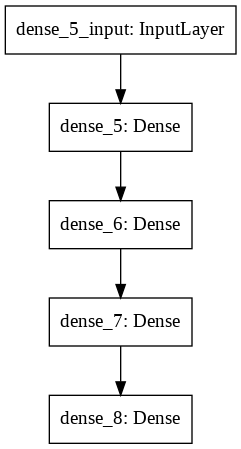

In [0]:
dnn_2 = Sequential()
dnn_2.add(Dense(64, input_dim = 18, activation='relu'))
# dnn_2.add(Dropout(0.4))
dnn_2.add(Dense(64, activation='relu'))
# dnn_2.add(Dropout(0.4))
dnn_2.add(Dense(64, activation='relu'))
# dnn_2.add(Dropout(0.4))
dnn_2.add(Dense(1, activation='linear'))
print('Model : DNN 2', dnn_2.summary())
plot_model(dnn_2)

In [0]:
dnn_2.compile(loss='mae', optimizer='adam', metrics=['mae'])
dnn_2.fit(X_Intel, Y_Intel, epochs = 100, batch_size = 10, verbose = 2)

Epoch 1/100
 - 0s - loss: 0.6398 - mean_absolute_error: 0.6398
Epoch 2/100
 - 0s - loss: 0.6216 - mean_absolute_error: 0.6216
Epoch 3/100
 - 0s - loss: 0.6209 - mean_absolute_error: 0.6209
Epoch 4/100
 - 0s - loss: 0.6269 - mean_absolute_error: 0.6269
Epoch 5/100
 - 0s - loss: 0.6188 - mean_absolute_error: 0.6188
Epoch 6/100
 - 0s - loss: 0.6206 - mean_absolute_error: 0.6206
Epoch 7/100
 - 0s - loss: 0.6195 - mean_absolute_error: 0.6195
Epoch 8/100
 - 0s - loss: 0.6164 - mean_absolute_error: 0.6164
Epoch 9/100
 - 0s - loss: 0.6142 - mean_absolute_error: 0.6142
Epoch 10/100
 - 0s - loss: 0.6181 - mean_absolute_error: 0.6181
Epoch 11/100
 - 0s - loss: 0.6172 - mean_absolute_error: 0.6172
Epoch 12/100
 - 0s - loss: 0.6190 - mean_absolute_error: 0.6190
Epoch 13/100
 - 0s - loss: 0.6215 - mean_absolute_error: 0.6215
Epoch 14/100
 - 0s - loss: 0.6150 - mean_absolute_error: 0.6150
Epoch 15/100
 - 0s - loss: 0.6206 - mean_absolute_error: 0.6206
Epoch 16/100
 - 0s - loss: 0.6154 - mean_absolute

In [0]:
# Freeze the layers except the last 2 dense layers
for layer in dnn_2.layers[:-2]:
    layer.trainable = False
    print(layer)

# Check the trainable status of the individual layers
for layer in dnn_2.layers:
    print(layer, layer.trainable)

<keras.layers.core.Dense object at 0x7f9b418ddf60> False
<keras.layers.core.Dense object at 0x7f9b418dde48> False
<keras.layers.core.Dense object at 0x7f9b418edeb8> True
<keras.layers.core.Dense object at 0x7f9b4072b4e0> True


In [0]:
dnn_2.fit(X_train_ARM, Y_train_ARM, epochs = 100, batch_size = 1, verbose = 2)

Epoch 1/100
 - 0s - loss: 0.8769 - mean_absolute_error: 0.8769
Epoch 2/100
 - 0s - loss: 0.8542 - mean_absolute_error: 0.8542
Epoch 3/100
 - 0s - loss: 0.8368 - mean_absolute_error: 0.8368
Epoch 4/100
 - 0s - loss: 0.8018 - mean_absolute_error: 0.8018
Epoch 5/100
 - 0s - loss: 0.7820 - mean_absolute_error: 0.7820
Epoch 6/100
 - 0s - loss: 0.7432 - mean_absolute_error: 0.7432
Epoch 7/100
 - 0s - loss: 0.7044 - mean_absolute_error: 0.7044
Epoch 8/100
 - 0s - loss: 0.6734 - mean_absolute_error: 0.6734
Epoch 9/100
 - 0s - loss: 0.6445 - mean_absolute_error: 0.6445


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 10/100
 - 0s - loss: 0.6427 - mean_absolute_error: 0.6427
Epoch 11/100
 - 0s - loss: 0.5870 - mean_absolute_error: 0.5870
Epoch 12/100
 - 0s - loss: 0.6170 - mean_absolute_error: 0.6170
Epoch 13/100
 - 0s - loss: 0.6001 - mean_absolute_error: 0.6001
Epoch 14/100
 - 0s - loss: 0.5273 - mean_absolute_error: 0.5273
Epoch 15/100
 - 0s - loss: 0.4505 - mean_absolute_error: 0.4505
Epoch 16/100
 - 0s - loss: 0.4529 - mean_absolute_error: 0.4529
Epoch 17/100
 - 0s - loss: 0.4520 - mean_absolute_error: 0.4520
Epoch 18/100
 - 0s - loss: 0.4067 - mean_absolute_error: 0.4067
Epoch 19/100
 - 0s - loss: 0.4205 - mean_absolute_error: 0.4205
Epoch 20/100
 - 0s - loss: 0.4179 - mean_absolute_error: 0.4179
Epoch 21/100
 - 0s - loss: 0.3926 - mean_absolute_error: 0.3926
Epoch 22/100
 - 0s - loss: 0.3840 - mean_absolute_error: 0.3840
Epoch 23/100
 - 0s - loss: 0.3855 - mean_absolute_error: 0.3855
Epoch 24/100
 - 0s - loss: 0.3662 - mean_absolute_error: 0.3662
Epoch 25/100
 - 0s - loss: 0.3883 - mean

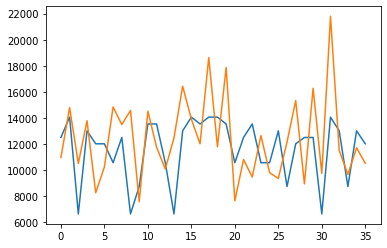

In [0]:
Y_pred = dnn_2.predict(X_test_ARM)
Y_pred = scaler_y.inverse_transform(Y_pred)
Y_fold = scaler_y.inverse_transform(Y_test_ARM)
plt.plot(Y_pred)
plt.plot(Y_fold)

MSE: 
 109220831576425.19

R2: 
 -0.0756089798055748

MAPE: 
 0.22134535175901088


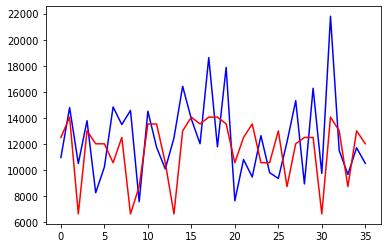

In [0]:
plt.figure()
plt.plot(Y_fold, 'b')
plt.plot(Y_pred, 'r')
Y_fold = scaler_y.inverse_transform(Y_fold)
Y_pred = scaler_y.inverse_transform(Y_pred)
r2_scores = (r2_score(Y_fold, Y_pred))
mse_scores = (mean_squared_error(Y_fold, Y_pred))
mape_scores = (absolute_percentage_error(Y_fold, Y_pred))
print('MSE: \n', mse_scores)
print('\nR2: \n', r2_scores)
print('\nMAPE: \n', mape_scores[0])